In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'C:/Users/SHOFCO SUN/Desktop/FIA Dataset/Train.csv')
test = pd.read_csv(r'C:/Users/SHOFCO SUN/Desktop/FIA Dataset/Test.csv')
SampleSubmission = pd.read_csv(r'C:/Users/SHOFCO SUN/Desktop/FIA Dataset/SampleSubmission.csv')
VariableDefinitions = pd.read_csv(r'C:/Users/SHOFCO SUN/Desktop/FIA Dataset/VariableDefinitions.csv')

In [3]:
#realizing the volume of data before synthesis
#checking dimension of the data
#every value represented by the turple corresponds to the actual value of the arrays/rows/columns



In [4]:
print('Shape of the train data', train.shape, sep = '-->')
print('Shape of the test data', test.shape, sep = '-->')
print(VariableDefinitions)


Shape of the train data-->(23524, 13)
Shape of the test data-->(10086, 12)
      Variable Definitions                                         Unnamed: 1
0                  country                         Country interviewee is in.
1                     year                           Year survey was done in.
2                 uniqueid             Unique identifier for each interviewee
3            location_type                     Type of location: Rural, Urban
4         cellphone_access  If interviewee has access to a cellphone: Yes, No
5           household_size               Number of people living in one house
6        age_of_respondent                         The age of the interviewee
7     gender_of_respondent                Gender of interviewee: Male, Female
8   relationship_with_head  The interviewee’s relationship with the head o...
9           marital_status  The martial status of the interviewee: Married...
10         education_level  Highest level of education: No formal e

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [7]:
train.isnull().sum()
#The dataset has  no missing values

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
train.head(7)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed


In [9]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [10]:
test.describe()

,year,household_size,age_of_respondent
count,10086.000000,10086.000000,10086.000000
mean,2016.975907,3.778802,38.308348
std,0.847356,2.212721,16.270053
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,20.000000,100.000000


In [11]:
#finding the number of unique value for each variable/feature
feature_count = train.nunique(dropna = False)
feature_count.sort_values()[:10]

bank_account               2
location_type              2
cellphone_access           2
gender_of_respondent       2
year                       3
country                    4
marital_status             5
relationship_with_head     6
education_level            6
job_type                  10
dtype: int64

In this case the target variable is bank_Account,
Analysis by using pivoting features which in this case I picked unique features

In [12]:
split=train.shape[0]
datasets=pd.concat([train,test],axis=0)

In [13]:
datasets.shape

(33610, 13)

## Data visualizations and Univariate analysis

<AxesSubplot:xlabel='country', ylabel='count'>

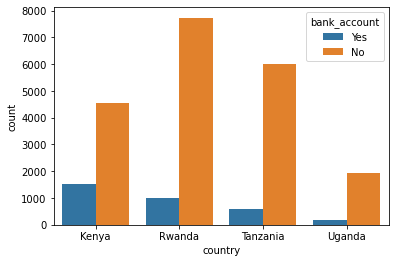

In [14]:
#country
sns.countplot(x=datasets['country'], hue = datasets['bank_account'])

<AxesSubplot:xlabel='year', ylabel='count'>

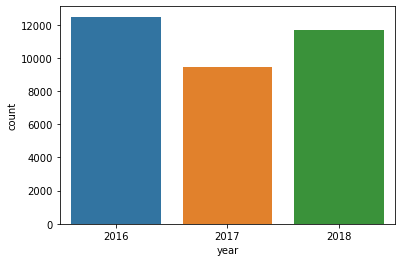

In [15]:
sns.countplot(x = datasets['year'])

In [16]:
# creating a dictionary that stores year with count
df = datasets['year']
year_frequency = {}

for item in df:
    year_frequency[item] = year_frequency.get(item, 0) + 1
    
    

In [17]:
print(year_frequency)

{2018: 11671, 2016: 12480, 2017: 9459}


In [21]:
for i

0
